# Testing out COVNET with Keras on MNIST Dataset

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
input_shape = (28,28,1)
num_classes = 10
print('Size of training dataset:', X_train.shape[0])
print('Size of test dataset:', X_test.shape[0])
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
print('Shape of image:', X_train.shape)


Size of training dataset: 60000
Size of test dataset: 10000
Shape of image: (60000, 28, 28, 1)


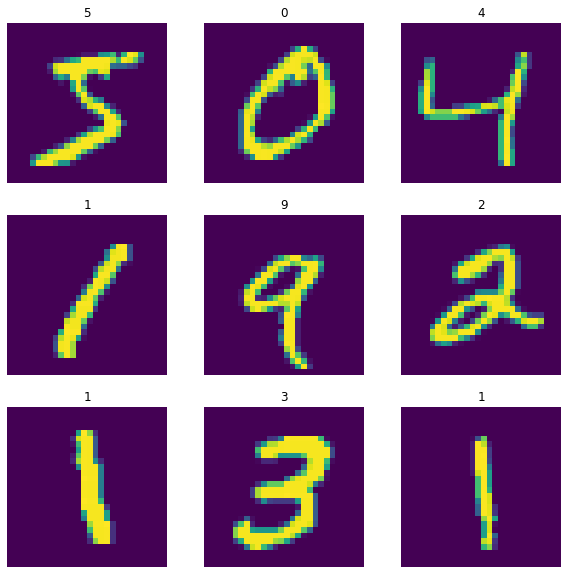

In [3]:
#Image Analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(X_train[i])
        plt.title(int(y_train[i]))
        plt.axis("off")

In [4]:
#one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Build Model

In [5]:
#Model
def make_model(input_size, num_classes):
    #input
    inputs = keras.Input(shape=input_size)
    
    #preprocessing
    x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
    
    #covnet
    x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    
    #output
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

model = make_model(input_size=input_shape, num_classes=num_classes)
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0     

# Train Model 

In [6]:
batch_size = 128
epochs = 15

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 23s 53ms/step - loss: 4.2507 - accuracy: 0.7068 - val_loss: 0.0827 - val_accuracy: 0.9758
Epoch 2/15
422/422 [==============================] - 20s 47ms/step - loss: 0.1949 - accuracy: 0.9419 - val_loss: 0.0623 - val_accuracy: 0.9812
Epoch 3/15
422/422 [==============================] - 17s 39ms/step - loss: 0.1397 - accuracy: 0.9587 - val_loss: 0.0506 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 16s 39ms/step - loss: 0.1251 - accuracy: 0.9622 - val_loss: 0.0561 - val_accuracy: 0.9840
Epoch 5/15
422/422 [==============================] - 17s 40ms/step - loss: 0.1050 - accuracy: 0.9678 - val_loss: 0.0427 - val_accuracy: 0.9875
Epoch 6/15
422/422 [==============================] - 20s 48ms/step - loss: 0.0948 - accuracy: 0.9710 - val_loss: 0.0403 - val_accuracy: 0.9883
Epoch 7/15
422/422 [==============================] - 20s 48ms/step - loss: 0.0836 - accuracy: 0.9740 - val_loss: 0.0391 - val_accuracy:

# Test Model

In [7]:
score = model.evaluate(X_test,y_test)
print('Loss:',score[0])
print('Accuracy:',score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0424 - accuracy: 0.9875
Loss: 0.042418964207172394
Accuracy: 0.987500011920929
